# Theta Lines transformer
Computes Theta lines to be used in ThetaForecaster.

The Theta lines are obtained by modifying the distances between the points of the original time series. We apply  coefficient θ (theta) to the second differences of the original observations, thus changing the local curvatures . Theta coefficient is a transformation parameter which creates series of the same mean and slope with that of the original data but different variances.

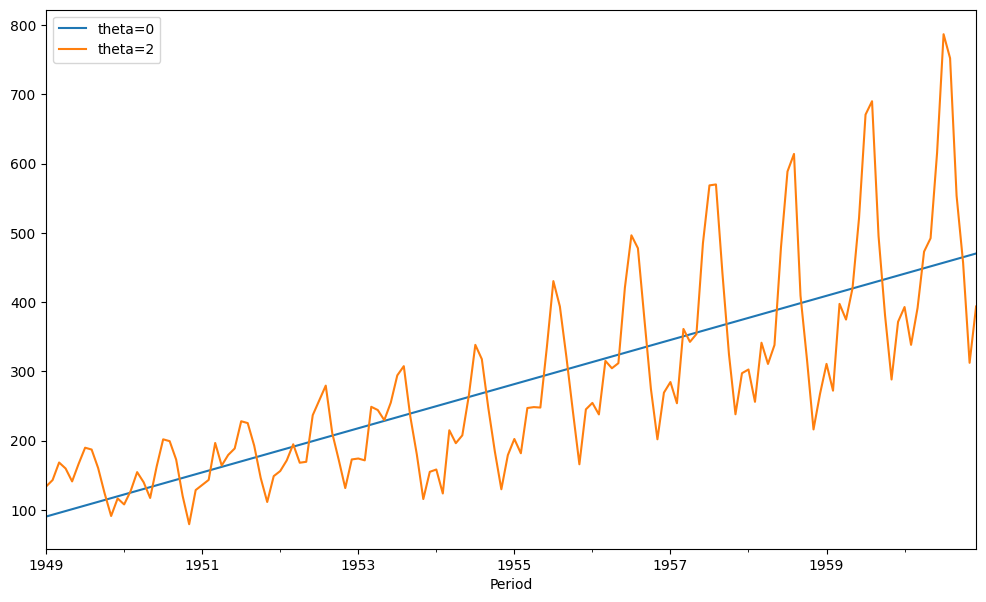

In [1]:
import matplotlib.pyplot as plt

from sktime.datasets import load_airline
from sktime.transformations.series.theta import ThetaLinesTransformer

y = load_airline()
transformer = ThetaLinesTransformer()
transformer.fit(y)
y_thetas = transformer.transform(y)

fig, ax = plt.subplots()
y_thetas.plot(ax=ax, figsize=(12, 7))
plt.legend(["theta=0", "theta=2"])

### Special cases: theta = 0 and theta = 1

Theta values **1 > theta > 0** *reduce* original time series curvatures. The smaller the value of Theta coefficient results in the larger deflation of time series.

Theta-line with **theta=0** gives a linear regression line.

(0.0, 900.0)

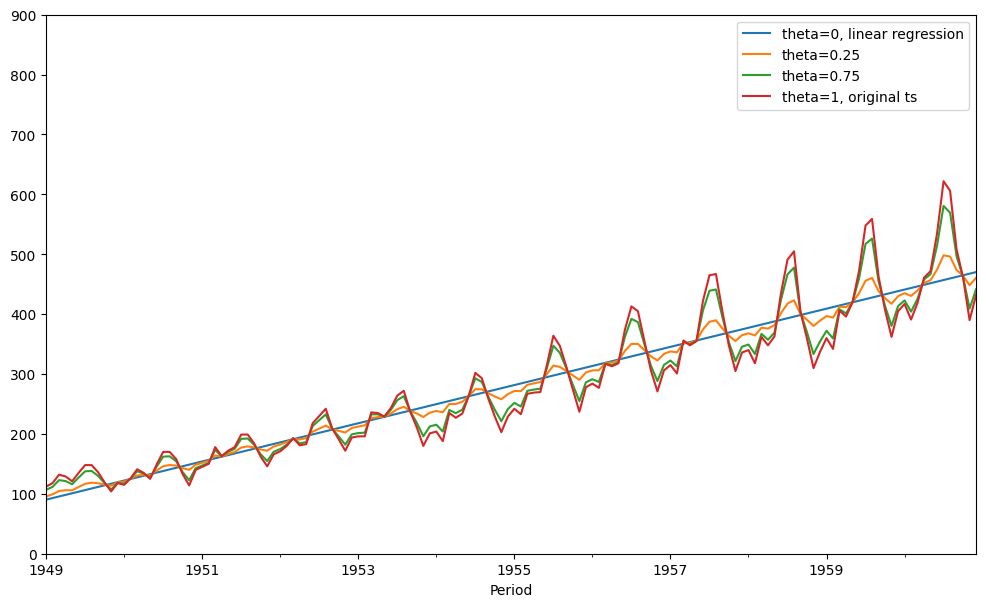

In [6]:
t = ThetaLinesTransformer([0, 0.25, 0.75, 1])
t.fit(y)
y_t = t.transform(y)

fig, ax = plt.subplots()
y_t.plot(ax=ax, figsize=(12, 7))
plt.legend(
    ["theta=0, linear regression", "theta=0.25", "theta=0.75", "theta=1, original ts"]
)
plt.ylim(0, 900)

Theta-line with **theta=1** returns original time series.

Theta values > 1 will *increase* local curvatures, and the larger theta coefficients will result in larger dilation.

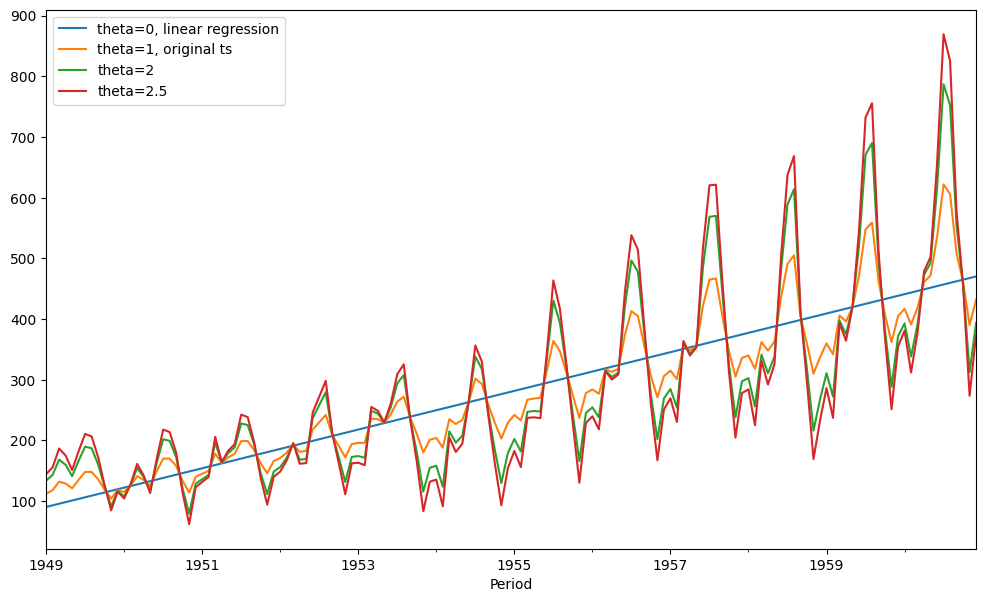

In [7]:
t_1 = ThetaLinesTransformer([0, 1, 2, 2.5])
t_1.fit(y)
y_t1 = t_1.transform(y)

fig, ax = plt.subplots()
y_t1.plot(ax=ax, figsize=(12, 7))
plt.legend(
    ["theta=0, linear regression", "theta=1, original ts", "theta=2", "theta=2.5"]
)